In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Variance/Covariance
On revient sur une distribution bien connu.
Générer $10000$ variables aléatoires gaussiennes de moyenne $0$ et de variance $1$.
  * Tracer l'histogramme des points, et données (à l'oeil) une estimation de la variance
  * Changer la variance et observer si la valeur correspond bien à ce que l'on observe sur l'histogramme

/home/aurele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/home/aurele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/aurele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


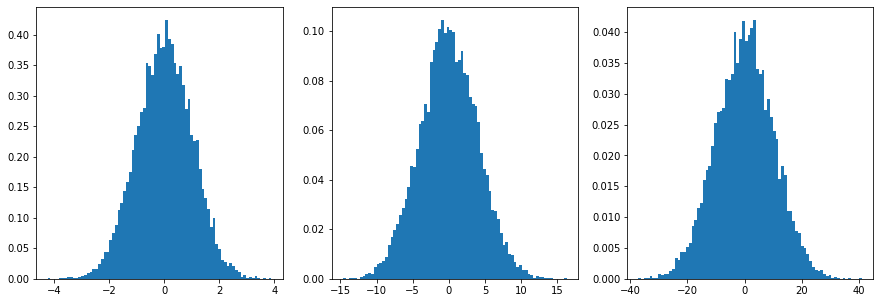

In [2]:
# on génère des nombres gaussiens
f,ax = plt.subplots(1,3,figsize=(15,5))
x = np.random.normal(loc=0,scale=1,size=(10000))
ax[0].hist(x,bins=80,density=True)
x = np.random.normal(loc=0,scale=4,size=(10000))
ax[1].hist(x,bins=80,density=True)
x = np.random.normal(loc=0,scale=10,size=(10000))
ax[2].hist(x,bins=80,density=True)
plt.show()

On va voir maintenant ce qu'il se passe en dimension $d=2$. Utiliser la fonction suivante pour générer des points en deux dimensions
```python
covar = [[1,0],[0,1]]
m = [0,0]
x = np.random.multivariate_normal(mean=m,cov=covar,size=(100000))
```

  * tracez l'histogramme 2D (cf le tp précédent) et regardez si vous réussissez à observer l'ordre de grandeur de la variance sur le plot
  * mettez des valeurs differents pour la variance selon x et selon y, que constatez-vous sur l'histogramme ?

(100000, 2)


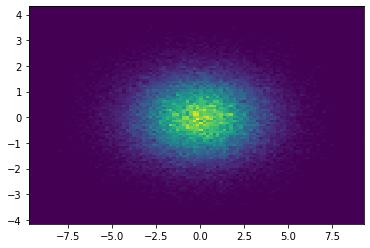

In [3]:
# on génère des nombres gaussiens
x = np.random.multivariate_normal(mean=[0,0],cov = [[5, 0], [0, 1]],size=(100000))
print(x.shape)
plt.hist2d(x[:,0],x[:,1],bins=100)
plt.show()

En utilisant la matrice de covariance suivante : 
```python
cov = [[5, 1], [1, 1]]
```
Regarder l'histogramme obtenu.
  * Définir un vecteur unitaire $\vec{u}$ aléatoirement, et calculer la variance le long de ce vecteur
  * Calculer l'erreur de reconstruction le long de cette direction
  * En observant l'histogramme tracé précédemment, essayer de construire un vecteur $\vec{u}$ qui suivrait la forme du nuage de points.
  * Calculer l'erreur de reconstruction le long de cette direction

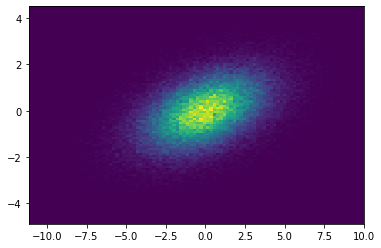

In [4]:
# on génère des nombres gaussiens
cov = [[5, 1], [1, 1]]
x = np.random.multivariate_normal(mean=[0,0],cov = [[5, 1], [1, 1]],size=(100000))
plt.hist2d(x[:,0],x[:,1],bins=100)
plt.show()

In [5]:
Ns = x.shape[0]
# Vecteur aléatoire
u = 2*np.random.random(size=(2))-1
# Normalisation
u = u/np.linalg.norm(u)
print("u= ",u)

# Calcul de la variance

# D'abord on calcule la moyenne
m = np.mean(x,axis=0)
print("moy= ",m)
# puis on la projette le long de u
m_u = m.dot(u)
print("moy= ",m_u)

# Variance le long de u
Var_u = np.mean((np.matmul(u,x.T) - m_u)**2)
print("Var_u = ",Var_u)

# Calcul de l'erreur
Proj = x - np.matmul(np.matmul(u,x.T).reshape(Ns,1),u.reshape(1,2))
sumn = 0
for i in Proj:
    sumn += np.linalg.norm(i)
print("erreur=", sumn/Ns)

u=  [-0.57116644  0.82083427]
moy=  [ 0.00104488 -0.00628043]
moy=  -0.005751992042036335
Var_u =  1.3714792767341306
erreur= 1.7173592457855347


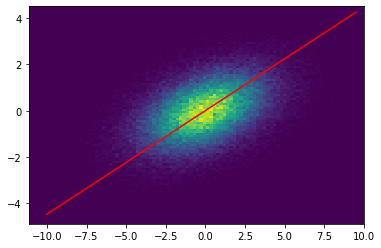

In [6]:
# On choisit une direction plus intelligemment

Vdir = np.array([1,cov[0][1]]) # np.sqrt(VV[0]*VV[1])])
Vdir = Vdir/np.linalg.norm(Vdir)

# on montre la direction
plt.hist2d(x[:,0],x[:,1],bins=100);
myx = np.arange(-10,10,0.5)

myy = myx*cov[0][1]/np.sqrt(cov[0][0]*cov[1][1])
plt.plot(myx,myy,color='red')

In [7]:
# Calcul de la variance
m = np.mean(x,0)
m_u = m.dot(Vdir)
Var_u = np.mean((np.matmul(Vdir,x.T) - m_u)**2)
print("Var_u = ",Var_u)

# Calcul de l'erreur
Proj = x - np.matmul(np.matmul(Vdir,x.T).reshape(Ns,1),Vdir.reshape(1,2))
sumn = 0
for i in Proj:
    sumn += np.linalg.norm(i)
print("erreur=", sumn/Ns)

Var_u =  3.991769262057966
erreur= 1.1296020148649943


#### Analyse en composantes principales

On cherche à voir comment étudier les données à l'aide de l'ACP. Reprenez les données 2D ci-dessus avec la matrice de covariance non diagonale.
  1. Calculer la matrice de covariance (on pourra utiliser la fonction np.matmul)
  2. Diagonaliser la matrice de covariance à l'aide de la fonction np.linalg.eig
  3. Afficher sur le scatter-plot des données, les directions obtenues par la diagonalisation (on peut utiliser la fonction plt.quiver)
  4. Calculer l'erreur de reconstruction le long de la direction de plus grande variance obtenue par la diagonalisation.

(100000, 2)
[0.97341905 0.22903135]
[5.22740448 0.76758703]


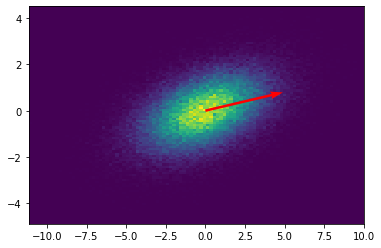

In [8]:
print(x.shape)
S = np.matmul(x.T,x)/Ns
val_p, vec_p = np.linalg.eig(S)
# prermier vecteur propre
print(vec_p[:,0]) 
# valeurs propres de la matrice
print(val_p)

Vdir = np.array([1,cov[0][1]]) # np.sqrt(VV[0]*VV[1])])
Vdir = Vdir/np.linalg.norm(Vdir)
plt.hist2d(x[:,0],x[:,1],bins=100);

# comment va la direction
origin = [0], [0] # origin point
plt.quiver(*origin, 5*vec_p[0,0], 5*vec_p[1,0], color=['r','b','g'], scale=21)

In [9]:
u = vec_p[:,0]
print(u)
# Calcul de la variance
m = np.mean(x,0)
m_u = m.dot(u)
Var_u = np.mean((np.matmul(u,x.T) - m_u)**2)
print("Var_u = ",Var_u)

# Calcul de l'erreur
Proj = x - np.matmul(np.matmul(u,x.T).reshape(Ns,1),u.reshape(1,2))
sumn = 0
for i in Proj:
    sumn += np.linalg.norm(i)
print("erreur=", sumn/Ns)

[0.97341905 0.22903135]
Var_u =  5.227404298242402
erreur= 0.6992060338402833


En utilisant la bibliothèque scikit-learn :
```python
from sklearn.decomposition import PCA
mypca = PCA(n_components=2)
X_tf = mypca.fit(X)
print(X_tf.components_)
print(X_tf.singular_values_)
```

Vérifier que vous retrouvez bien les directions équivalentes et la variance du jeu de données.

In [10]:
from sklearn.decomposition import PCA
tfpca = PCA(n_components=2)
X_tf = tfpca.fit(x)
print(X_tf.components_)
print(X_tf.singular_values_)

[[-0.97341918 -0.22903077]
 [-0.22903077  0.97341918]]
[723.0079044  277.04632743]


In [11]:
X_tf.singular_values_**2/Ns

array([5.2274043 , 0.76754668])